In [1]:
import warnings
warnings.filterwarnings("ignore")

from pydataset import data

import pandas as pd
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

### 1.  Load the tips dataset from either pydataset or seaborn.

In [2]:
# load the data set
tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [3]:
# Create a copy dataframe that I can add baseline and predictions column to 
df = tips.copy()

#define x and y
X = df[['total_bill']]
y = df.tip

# calculate a baseline from mean of tips and add it to the dataframe 
df['baseline'] = df.tip.mean()

df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


In [4]:
# fit linear regression model that predicts tips using total_bill
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

# add my predictions to the dataframe
df['yhat'] = predictions
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


### 3. Plot the residuals for the linear regression model that you made.

In [5]:
# compute residuals

df['baseline_residual'] = df['tip'] - df['baseline']
df['residual'] = df['tip'] - df['yhat']

df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,baseline_residual,residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.988279,-1.694636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-1.338279,-0.346223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.501721,0.373165
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.311721,-0.097250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.611721,0.107178


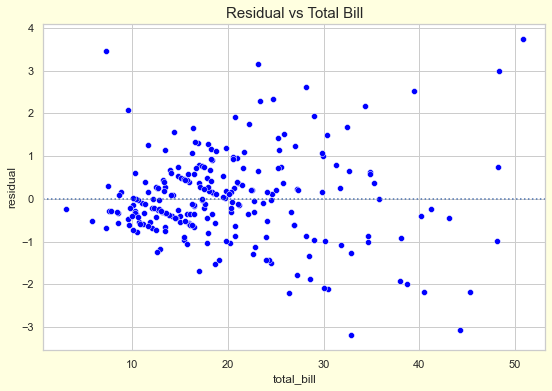

In [6]:
# Plot residual vs total_bill
plt.figure(figsize = (9,6), facecolor="lightyellow")
sns.set_theme(style='whitegrid')
sns.scatterplot(x = 'total_bill', y = 'residual', data = df, color="blue")
plt.axhline(0, ls = ':')
plt.title("Residual vs Total Bill", fontsize = 15)
plt.show()

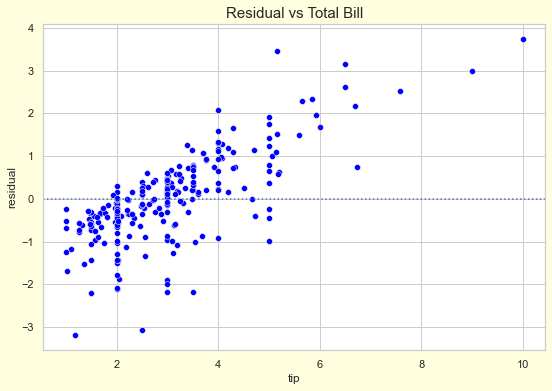

In [7]:
# Plot residual vs tip
plt.figure(figsize = (9,6), facecolor="lightyellow")
sns.set_theme(style='whitegrid')
sns.scatterplot(x = 'tip', y = 'residual', data = df, color="blue")
plt.axhline(0, ls = ':')
plt.title("Residual vs Total Bill", fontsize = 15)
plt.show()

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [8]:
# Calculate Sum of squared errors
## First square each residual value
residual_squared = df.residual ** 2

In [9]:
# Calculate SSE
SSE = sum(residual_squared)
print('SSE = ', SSE)

SSE =  252.78874385077597


In [10]:
# Calculate Explained sum of squares
ESS = sum((df.yhat - df.tip.mean())**2)
print('ESS = ', ESS)

ESS =  212.42373319840416


In [11]:
# Calculate total sum of squares

TSS = ESS + SSE
print('TSS = ', TSS)

TSS =  465.21247704918017


In [12]:
# Calculate mean squared error

MSE = SSE/len(df)
print('MSE = ', MSE)

MSE =  1.0360194420113769


In [13]:
# Calculate mean squared error
RMSE = sqrt(MSE)
print('RMSE = ', RMSE)

RMSE =  1.0178504025697377


## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [14]:
# Calculate Sum of squared errors of baseline
## First square each residual value
baseline_residual_squared = df.baseline_residual ** 2
SSE_baseline = sum(baseline_residual_squared)
print('SSE of baseline = ', SSE_baseline)

SSE of baseline =  465.21247704918085


In [15]:
# Calculate mean squared error of baseline
MSE_baseline = SSE_baseline/len(df)
print('MSE of baseline = ', MSE_baseline)

MSE of baseline =  1.9066085124966428


In [16]:
# Calculate mean squared error of baseline
RMSE_baseline = sqrt(MSE_baseline)
print('RMSE of baseline = ', RMSE_baseline)

RMSE of baseline =  1.3807999538298958


## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [17]:
if SSE < SSE_baseline:
    print('My model performs better than the baseline model.')
    print('SSE = ', SSE)
    print('SSE of baseline = ', SSE_baseline)
else:
    print('My model underperforms the baseline model.')
    print('SSE = ', SSE)
    print('SSE of baseline = ', SSE_baseline)

My model performs better than the baseline model.
SSE =  252.78874385077597
SSE of baseline =  465.21247704918085


## 7. What is the amount of variance explained in your model?

In [18]:
r2_score(df.tip, df.yhat)

0.45661658635167657

## 8. Is your model better than the baseline model?

In [19]:
# Evaluate Using r2 score
if r2_score(df.tip, df.yhat) > r2_score(df.tip, df.baseline):
    print('My model peforms better than the baseline model.')
    print('------------------------------------------------')
    print('Model r2 score = ', r2_score(df.tip, df.yhat))
    print('Baseline model r2 score = ', r2_score(df.tip, df.baseline))
else: 
    print('My model underperforms the baseline model.')
    print('------------------------------------------------')
    print('Model r2 score = ', r2_score(df.tip, df.yhat))
    print('Baseline model r2 score = ', r2_score(df.tip, df.baseline))

My model peforms better than the baseline model.
------------------------------------------------
Model r2 score =  0.45661658635167657
Baseline model r2 score =  1.1102230246251565e-16


In [20]:
# Evaluate by comparing RMSE
if RMSE < RMSE_baseline:
    print('My model peforms better than the baseline model.')
    print('------------------------------------------------')
    print('Model RMSE = ', RMSE)
    print('Baseline RMSE = ', RMSE_baseline)
else: 
    print('My model underperforms the baseline model.')
    print('------------------------------------------------')
    print('Model RMSE = ', RMSE)
    print('Baseline model RMSE = ', RMSE_baseline)

My model peforms better than the baseline model.
------------------------------------------------
Model RMSE =  1.0178504025697377
Baseline RMSE =  1.3807999538298958


## 9. Create a file named evaluate.py that contains the following functions:
#### - regression_errors(y, yhat): returns the following values:
#### - sum of squared errors (SSE)
#### - explained sum of squares (ESS)
#### - total sum of squares (TSS)
#### - mean squared error (MSE)
#### - root mean squared error (RMSE)
#### - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
#### - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

*Created evaluate.py file*

In [21]:
# Import and test out functions
import evaluate as ev

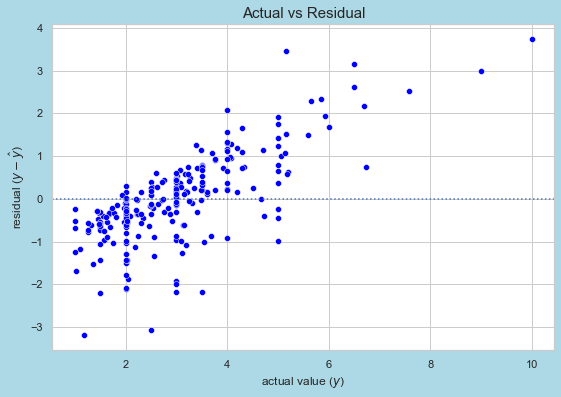

In [22]:
ev.plot_residuals(df.tip, df.yhat, df)

In [23]:
ev.regression_errors(df.tip, df.yhat)

sse     252.788744
ess     212.423733
tss     465.212477
mse       1.036019
rmse      1.017850
r2        0.456617
dtype: float64

In [24]:
ev.baseline_mean_errors(df.tip)

{'sse': 465.2124770491804,
 'mse': 1.906608512496641,
 'rmse': 1.3807999538298954}

In [25]:
ev.better_than_baseline(df.tip, df.yhat)

True

## 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [26]:
# Load the data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [27]:
# Create a copy dataframe that I can add baseline and predictions column to 
df = mpg.copy()

#define x and y
X = df[['displ']]
y = df.hwy

# calculate a baseline from mean of tips and add it to the dataframe 
df['baseline'] = df.hwy.mean()

df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,baseline
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.440171
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,23.440171
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,23.440171
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,23.440171
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,23.440171


In [28]:
# fit linear regression model that predicts tips using total_bill
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

# add my predictions to the dataframe
df['yhat'] = predictions

# Create variables for actual and predicted to use in functions
actual = df.hwy
predicted = df.yhat
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,baseline,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.440171,29.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,23.440171,29.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,23.440171,28.636473
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,23.440171,28.636473
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,23.440171,25.812002


In [29]:
ev.regression_errors(actual, predicted)

sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
r2         0.586787
dtype: float64

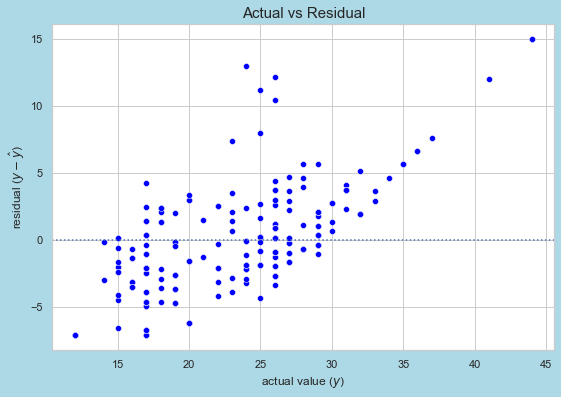

In [30]:
ev.plot_residuals(actual, predicted, df)

In [31]:
ev.baseline_mean_errors(actual)

{'sse': 8261.66239316239, 'mse': 35.30624954342902, 'rmse': 5.941906221359356}

In [32]:
ev.better_than_baseline(actual, predicted)

True

In [36]:
# Manually evaluate
r2 = ev.r2_score(actual, predicted)
r2_baseline = ev.r2_score(actual, df.baseline)
r2, r2_baseline

(0.5867866723989038, 0.0)

In [37]:
# Evaluate Using r2 score
if r2 > r2_baseline:
    print('My model peforms better than the baseline model.')
    print('------------------------------------------------')
    print('Model r2 score = ', r2)
    print('Baseline model r2 score = ', r2_baseline)
else: 
    print('My model underperforms the baseline model.')
    print('------------------------------------------------')
    print('Model r2 score = ', r2)
    print('Baseline model r2 score = ', r2_baseline)

My model peforms better than the baseline model.
------------------------------------------------
Model r2 score =  0.5867866723989038
Baseline model r2 score =  0.0
